# Multiclass logistic regression

- softmax function

$$
\text{softmax}(\boldsymbol{z}) = \frac{e^{\boldsymbol{z}} }{\sum_{i=1}^k e^{z_i}}
$$

- To be a valid probability distribution, we’ll want the output ŷ  to (i) contain only non-negative values, and (ii) sum to 1. 
- softmax regression/multiclass logistic regression/multinomial regression
- batch training
    $\underset{1 \times k}{\boldsymbol z} = \underset{1 \times d}{\boldsymbol{x}}\ \underset{d \times k}{W} + \underset{1 \times k}{\boldsymbol{b}}$
    - Often we would one-hot encode the output label

$$
\underset{1 \times k}{\boldsymbol{\hat{y}}_{one-hot}} = \text{softmax}_{one-hot}(\underset{1 \times k}{\boldsymbol z})
$$

In [21]:
import numpy as np
import mxnet as mx
from mxnet import nd, autograd, gluon   

mx.random.seed(1)

data_ctx = mx.cpu()
model_ctx = mx.cpu()



In [2]:
def transform(data, label):
    return data.astype(np.float32) / 255, label.astype(np.float32)
mnist_train = gluon.data.vision.MNIST(train=True, transform=transform)
mnist_test = gluon.data.vision.MNIST(train=False, transform=transform)


/home/zhenglai/repo/incubator-mxnet/python/mxnet/gluon/data/vision/datasets.py:82: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  label = np.fromstring(fin.read(), dtype=np.uint8).astype(np.int32)


/home/zhenglai/repo/incubator-mxnet/python/mxnet/gluon/data/vision/datasets.py:86: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  data = np.fromstring(fin.read(), dtype=np.uint8)


In [5]:
image, label = mnist_train[0]
image.shape, label


((28, 28, 1), 5.0)

In [6]:
nrof_inputs = 784
nrof_outputs = 10
nrof_examples = len(mnist_train)

60000

Machine learning libraries generally expect to find images in `(batch, channel, height, width)` format. However, most libraries for visualization prefer (height, width, channel)

In [13]:
im = mx.nd.tile(image, (1, 1, 3))
im.shape

(28, 28, 3)

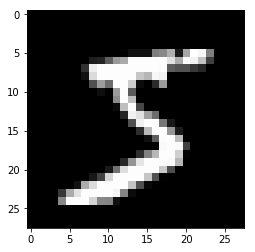

In [12]:
import matplotlib.pyplot as plt
plt.imshow(im.asnumpy())

In [18]:
batch_size = 64
train_data = mx.gluon.data.DataLoader(mnist_train, batch_size, shuffle=True)

In [19]:
test_data = mx.gluon.data.DataLoader(mnist_test, batch_size, shuffle=False)

In [22]:
W = nd.random_normal(shape=(nrof_inputs, nrof_outputs), ctx=model_ctx)
b = nd.random_normal(shape=(nrof_outputs,), ctx=model_ctx)
params = [W, b]

In [23]:
for param in params:
    param.attach_grad()

In [42]:
def softmax(y_linear):
    exp = nd.exp(y_linear - nd.max(y_linear, axis=1).reshape((-1, 1)))
    norms = nd.sum(exp, axis=1).reshape((-1, 1))
    return exp / norms


In [43]:
sample_y_linear = nd.random_normal(shape=(2,10))
sample_yhat = softmax(sample_y_linear)
print(sample_yhat)


[[0.13180801 0.23750314 0.13735262 0.02914972 0.05664325 0.10655795
  0.11066751 0.12052106 0.01621972 0.05357701]
 [0.0763194  0.01649208 0.05135053 0.27078566 0.05277882 0.20582882
  0.06589606 0.08017707 0.11866783 0.0617037 ]]
<NDArray 2x10 @cpu(0)>


In [39]:
print(nd.sum(sample_yhat, axis=1))